In [59]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [97]:
BatteryLife = pd.Series([176,183,185,190,191,192,201,205,214,220])
BatteryLife

0    176
1    183
2    185
3    190
4    191
5    192
6    201
7    205
8    214
9    220
dtype: int64

Probability plot

In [151]:
# the number of elements in the data array
L=len(BatteryLife)

In [153]:
# Find  the percentiles (quantiles) of the data
j=np.arange(1,L+1)
perc=(j-.5)/10
perc

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

Text(0.5, 1.0, 'Battery Life normal probability plot')

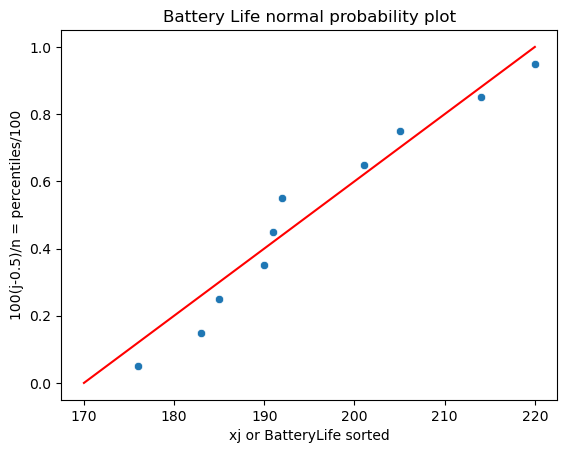

In [190]:
# probability plot for Battery Life
sns.scatterplot(x=BatteryLife, y=perc)
sns.lineplot(x=[170,220], y=[0,1],color='red')
plt.xlabel('xj or BatteryLife sorted')
plt.ylabel('100(j-0.5)/n = percentiles/100')
plt.title('Battery Life normal probability plot')

In [162]:
# percentiles of the data for PP Plot
np.quantile(BatteryLife,perc)

array([179.15, 183.7 , 186.25, 190.15, 191.05, 191.95, 199.65, 204.  ,
       210.85, 217.3 ])

Quantile plot

In [195]:
# the z-score or standard normal ppf (point percent function) of the percentiles of normal distribution
from scipy.stats import norm
z=norm.ppf(perc)
z

array([-1.64485363, -1.03643339, -0.67448975, -0.38532047, -0.12566135,
        0.12566135,  0.38532047,  0.67448975,  1.03643339,  1.64485363])

Text(0.5, 1.0, 'Battery Life normal probability plot from standardized data')

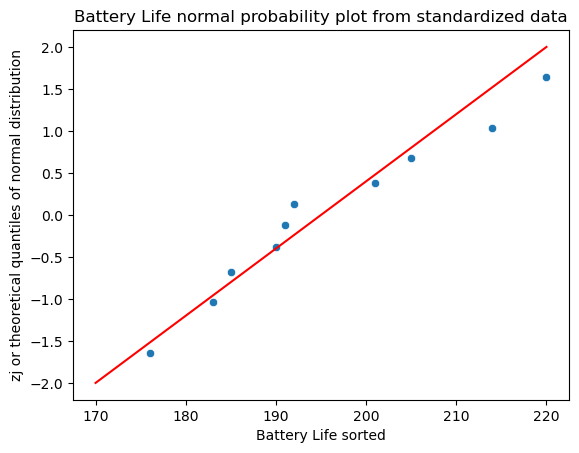

In [205]:
sns.scatterplot(x=BatteryLife, y=z)
sns.lineplot(x=[170,220], y=[-2,2],color='red')
plt.xlabel('Battery Life sorted')
plt.ylabel('zj or theoretical quantiles of normal distribution')
plt.title('Battery Life normal probability plot from standardized data')

QQ plot

In [266]:
# standardize the data
zB=(BatteryLife-np.mean(BatteryLife))/np.std(BatteryLife)

In [268]:
zB

0   -1.479865
1   -0.954025
2   -0.803785
3   -0.428184
4   -0.353064
5   -0.277944
6    0.398136
7    0.698616
8    1.374697
9    1.825417
dtype: float64

Text(0, 0.5, 'zj or theoretical quantiles of normal distribution')

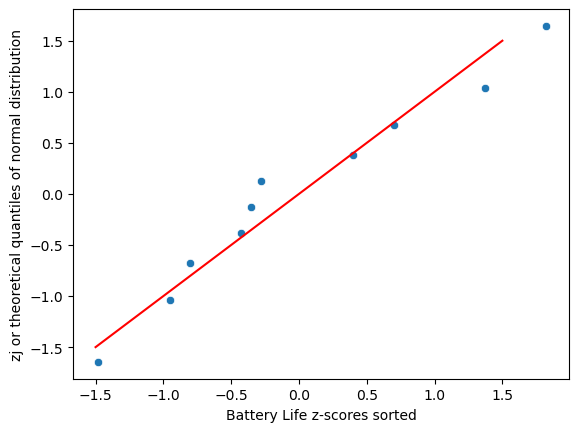

In [270]:
sns.scatterplot(x=zB, y=z)
sns.lineplot(x=[-1.5,1.5], y=[-1.5,1.5],color='red')
plt.xlabel('Battery Life z-scores sorted')
plt.ylabel('zj or theoretical quantiles of normal distribution')

Using Python to plot this QQ plot

In [273]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)

from scipy import stats

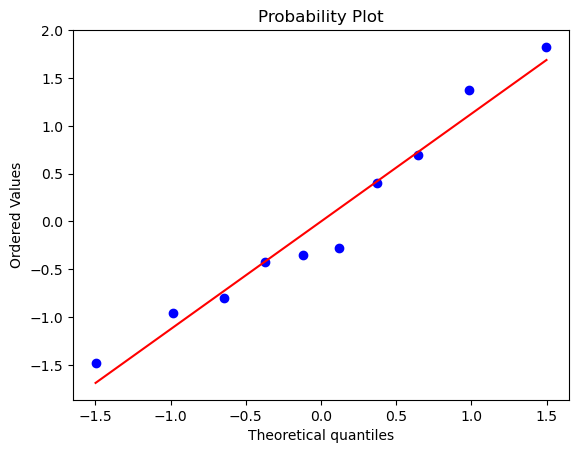

In [277]:
#Generates a probability plot of sample data against the quantiles of a specified theoretical distribution from scipy stats
# Note that the axes are swapped

fig,ax = plt.subplots(1)
fig=stats.probplot(zB, dist='norm',fit=True,plot=ax)

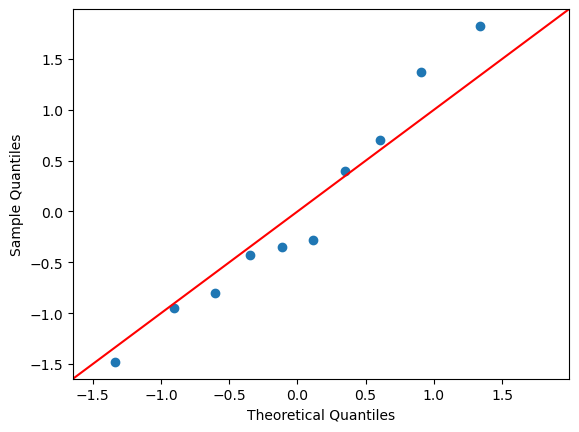

In [280]:
# Using a more detailed library of stats models
# Generates a probability plot of sample data against
# the quantiles of a specified theoretical distribution from stats models
import statsmodels.graphics.gofplots as sm

fig=sm.qqplot(BatteryLife,fit=True,line='45')